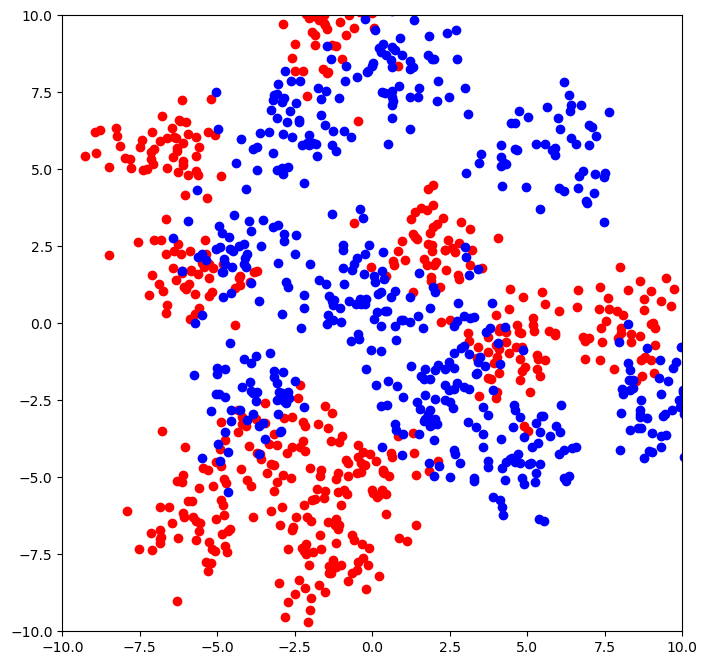

In [1]:
# Import necessary libraries
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# Generate a toy example using sklearn
X, y = make_blobs(n_samples=1000, centers=20)
labels = ["r", "b"]
y = np.take(labels, (y < 10))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Plot the scatter plot of the data
plt.figure(figsize=(8, 8))
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [2]:
def plot_surface(clf, X, y, 
                 xlim=(-10, 10), ylim=(-10, 10), n_steps=250, 
                 subplot=None, show=True):
    """
    Plot the decision boundary of a classifier.

    Parameters
    ----------
    clf : Classifier object
        The classifier to use for prediction.
    X : ndarray, shape (n_samples, n_features)
        The input data.
    y : ndarray, shape (n_samples,)
        The target labels.
    xlim : tuple, optional (default=(-10, 10))
        The limits of the x-axis.
    ylim : tuple, optional (default=(-10, 10))
        The limits of the y-axis.
    n_steps : int, optional (default=250)
        The number of steps to use in each direction for creating the grid.
    subplot : tuple, optional (default=None)
        The subplot configuration.
    show : bool, optional (default=True)
        Whether to show the plot.

    Returns
    -------
    None
    """
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)
        
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps), 
                         np.linspace(ylim[0], ylim[1], n_steps))
    
    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    
    if show:
        plt.show()

def plot_clf(clf, X, y):
    """
    Plot the decision boundary of a classifier.

    Parameters
    ----------
    clf : Classifier object
        The classifier to use for prediction.
    X : ndarray, shape (n_samples, n_features)
        The input data.
    y : ndarray, shape (n_samples,)
        The target labels.

    Returns
    -------
    None
    """
    plt.figure(figsize=(16, 8))
    plot_surface(clf, X, y, subplot=(1, 2, 1), show=False)

Iteration 1, loss = 0.65338996
Iteration 2, loss = 0.57758104
Iteration 3, loss = 0.53649758
Iteration 4, loss = 0.51197068
Iteration 5, loss = 0.48768190
Iteration 6, loss = 0.46585213
Iteration 7, loss = 0.45095724
Iteration 8, loss = 0.43813318
Iteration 9, loss = 0.42239026
Iteration 10, loss = 0.40765657
Iteration 11, loss = 0.39195623
Iteration 12, loss = 0.38168238
Iteration 13, loss = 0.37222992
Iteration 14, loss = 0.36022419
Iteration 15, loss = 0.35604275
Iteration 16, loss = 0.36121416
Iteration 17, loss = 0.38127404
Iteration 18, loss = 0.35984294
Iteration 19, loss = 0.34911568
Iteration 20, loss = 0.34745962
Iteration 21, loss = 0.33446978
Iteration 22, loss = 0.32773698
Iteration 23, loss = 0.32554249
Iteration 24, loss = 0.30864784
Iteration 25, loss = 0.31327844
Iteration 26, loss = 0.30445473
Iteration 27, loss = 0.30182820
Iteration 28, loss = 0.30010525
Iteration 29, loss = 0.29298056
Iteration 30, loss = 0.29302847
Iteration 31, loss = 0.28705194
Iteration 32, los

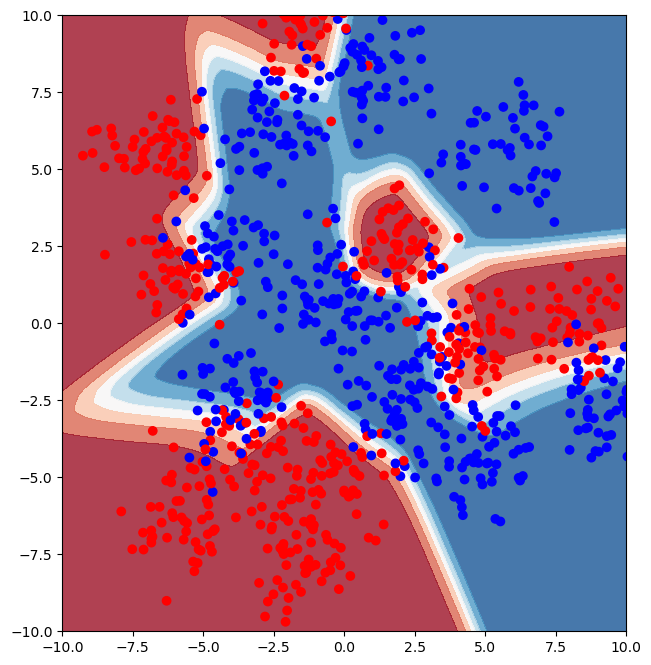

In [3]:
from sklearn.neural_network import MLPClassifier
# Train the neural network classifier with 3 hidden layers of 200 neurons each
clf = MLPClassifier(hidden_layer_sizes=(200, 200, 200), activation="relu", learning_rate="invscaling", verbose=True)
clf.fit(X_train, y_train)
plot_clf(clf, X, y)

Accuracy: 0.8933333333333333


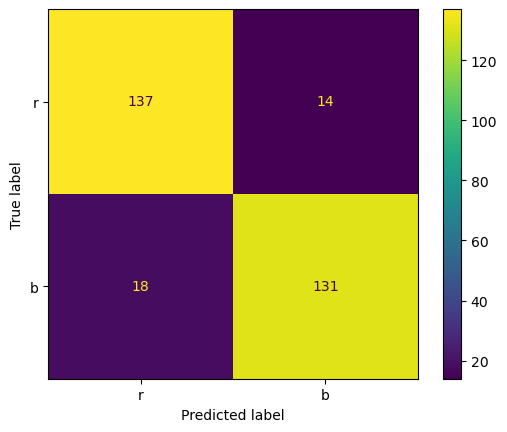

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Print the accuracy of the model on the testing set
print("Accuracy:", clf.score(X_test, y_test))
# Print the confusion matrix of the model on the testing set
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=labels)
plt.show()